In [1]:
import pandas as pd
pd.set_option('display.max_rows', 300)
pd.set_option("display.max_columns", 60)
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)
import numpy as np
from tqdm import tqdm
import statistics
%matplotlib inline
import utils


SOURCE_FOLDER = 'Source_data/'
CHECK_FOLDER = 'files_for_checking/'

/home/jane/3005/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
okato = pd.read_csv(SOURCE_FOLDER + 'OKATO.csv', dtype = 'object').OKATO
vzc = ['10', '11', '12', '20', '21', '22', '53', '54', '55', '61', '62', '63', '64', '65', '71', '72', '73', '74', '75']
valid_zagran_codes = ['53', '61', '62', '63', '64', '70', '71']
fns = pd.read_excel(SOURCE_FOLDER + 'Инспекции ФНС.xlsx', dtype = 'object').code

def define_quality_fl(tins, return_statistics = False, return_tins = False, return_prc = False, eval_quality = False):
    
    not_digit = []
    empty = []
        
    inn_ul = []
    zagran = []
    inn_ul = []
    passport_or_inn_ul = []
    inn = []
    inn_plus = []
    
    invalid_9_10_12 = []
    tin_less9 = []
    tin_more12 = []
    
    inn_ul_post = []
    zagran_post = []
    passport_or_inn_ul_post = []
    inn_post = []
    inn_plus_post = []
    
    invalid_9_10_12_post = []
    tin_less9_post = []
    tin_more12_post = []
    
    len_tin = len(tins)
    regexp = re.compile(r'\d')
   
    for tin in tins:
#         print(tin)
        
        if tin == 'nan':
            empty.append(tin)
#             print('Пусто')
        
        elif bool(re.search('\d', tin)):
            
            if bool(re.match('^[0-9]+$', tin)):
                               
                if len(tin)==9:
                    tin_10 = utils.add_digit(tin, 0, 'front') 
                    
                    if utils.validate_zagran(tin, vzc):
#                         print('Потенциально загран')
                        zagran.append(tin)
                    elif utils.validate_inn_ul(tin_10):
#                         print('Потенциально ИНН ЮЛ')
                        inn_ul.append(tin)
                    else:
#                         print('Невалидный документ')
                        invalid_9_10_12.append(tin)
                
                if len(tin)==10:
                    if (utils.validate_passport(tin, okato)) or (utils.validate_inn_ul(tin)):
#                         print('Потенциально валидный росс.паспорт или ИНН ЮЛ')
                        passport_or_inn_ul.append(tin)
                    else:
#                         print('Невалидный документ')
                        invalid_9_10_12.append(tin)
                        
                if len(tin)==12:
                    if utils.validate_inn(tin):
#                         print('Валидный ИНН')
                        inn.append(tin)
                    else:
#                         print('Невалидный документ')
                        invalid_9_10_12.append(tin)
                
                if len(tin) < 9:
#                     print('Длина TIN < 9 цифр')
                    tin_less9.append(tin)
                
                if len(tin) == 11:
                    tin_12 = utils.add_digit(tin, 0, 'front')
                    if utils.validate_inn(tin_12):
#                         print('Валидный ИНН')
                        inn_plus.append(tin)
                    else:
#                         print('Невалидный документ')
                        tin_more12.append(tin)
                
                if len(tin) == 13:
                    tin_12 = utils.delete_digit(tin, 'front')
                    if utils.validate_inn(tin_12):
#                         print('Валидный ИНН')
                        inn_plus.append(tin)
                    else:
#                         print('Невалидный документ')
                        tin_more12.append(tin)
                
                        
                if len(tin) > 13:
#                     print('Длина TIN > 12 цифр')
                    tin_more12.append(tin)
            
            else:
#                 print('Зашумленные данные')
                tin = utils.replace_hidden(tin)
                tin_splited = utils.split_clean(tin)
                len_tin += len(tin_splited)-1
            
                for tin in tin_splited:
                    
                    if len(tin)==9:
                        tin_10 = utils.add_digit(tin, 0, 'front') 
                        if utils.validate_zagran(tin, vzc):
#                         print('Потенциально загран после обработки')
                            zagran_post.append(tin)
                        elif utils.validate_inn_ul(tin_10):
#                         print('Потенциально ИНН ЮЛ после обработки')
                            inn_ul_post.append(tin)
                        else:
#                             print('Невалидный документ после обработки')
                            invalid_9_10_12_post.append(tin)
                    
                    if len(tin)==10:
                        if (utils.validate_passport(tin, okato)) or (utils.validate_inn_ul(tin)):
#                             print('Потенциально валидный росс.паспорт или ИНН ЮЛ после обработки')
                            passport_or_inn_ul_post.append(tin)
                        else:
#                             print('Невалидный документ после обработки')
                            invalid_9_10_12_post.append(tin)
                            
                    if len(tin)==12:
                        if utils.validate_inn(tin):
#                             print('Валидный ИНН после обработки')
                            inn_post.append(tin)
                        else:
#                             print('Невалидный документ после обработки')
                            invalid_9_10_12_post.append(tin)
                    
                    if len(tin) < 9:
#                         print('Длина TIN < 9 цифр после обработки')
                        tin_less9_post.append(tin)
                    
                    if len(tin) == 11:
                        tin_12 = utils.add_digit(tin, 0, 'front')
                        if utils.validate_inn(tin_12):
#                             print('Валидный ИНН после обработки')
                            inn_plus_post.append(tin)
                        else:
#                             print('Невалидный документ после обработки')
                            tin_more12_post.append(tin)
    
                    if len(tin) == 13:
                        tin_12 = utils.delete_digit(tin, 'front')
                        if utils.validate_inn(tin_12):
#                         print('Валидный ИНН')
                            inn_plus_post.append(tin)
                        else:
#                         print('Невалидный документ')
                            tin_more12_post.append(tin)
                            
                    if len(tin) > 12:
#                         print('Длина TIN > 12 цифр после обработки')
                        tin_more12_post.append(tin)
                
        else:
            not_digit.append(tin)
#             print('TIN не содержит цифры')
        
        
    good_after = inn_ul+zagran_post+inn_ul_post + passport_or_inn_ul_post + inn_post+inn_plus+inn_plus_post    
    good_quality = zagran + passport_or_inn_ul + inn
    poor_quality = not_digit + tin_less9 + tin_more12 + invalid_9_10_12 + tin_less9_post \
    +tin_more12_post + invalid_9_10_12_post
        
    contain_only_digits = zagran+inn_ul+passport_or_inn_ul+inn+invalid_9_10_12+tin_less9+tin_more12+inn_plus
    noizy_data = zagran_post+inn_ul_post+passport_or_inn_ul_post+inn_post+invalid_9_10_12_post+tin_less9_post \
    +tin_more12_post+inn_plus_post
    contain_digits = contain_only_digits+noizy_data
    
    possible_quality_9_10_12 = zagran+inn_ul+passport_or_inn_ul+inn+inn_plus+invalid_9_10_12
    possible_quality_9_10_12_post = zagran_post+inn_ul_post+passport_or_inn_ul_post+inn_post+inn_plus_post \
    +invalid_9_10_12_post
    
    innplus = inn_plus + inn_plus_post
    innulplus = inn_ul+inn_ul_post
    inn_plus_all = innplus + innulplus
    
    cd = len(contain_digits)/len_tin
    nd = len(not_digit)/len_tin
    emp = len(empty)/len_tin
    cod = len(contain_only_digits)/len_tin
    pq = len(possible_quality_9_10_12)/len_tin
    tm12 = len(tin_more12)/len_tin
    tl9 =len(tin_less9)/len_tin
    zoi = len(zagran)/len_tin
    poi = len(passport_or_inn_ul)/len_tin
    ipr = len(inn)/len_tin
    inv = len(invalid_9_10_12)/len_tin
        
    noda = len(noizy_data)/len_tin
    pqp = len(possible_quality_9_10_12_post)/len_tin
    tm12p = len(tin_more12_post)/len_tin
    tl9p =len(tin_less9_post)/len_tin
    zoip = len(zagran_post)/len_tin
    poip = len(passport_or_inn_ul_post)/len_tin
    iprp = len(inn_post)/len_tin
    invp = len(invalid_9_10_12_post)/len_tin
    
    innulp = len(innulplus)/len_tin
    innp = len(innplus)/len_tin
    ipa = len(inn_plus_all)/len_tin
    
    gq = len(good_quality)/len_tin
    poqu = len(poor_quality)/len_tin
    gqp = len(good_after)/len_tin
        
    if return_statistics:
        print('Содержат цифры: {} %'.format(round(cd*100, 1)))
        print('Содержат ТОЛЬКО буквы/символы: {} %\n'.format(round(nd*100, 1)))
#         print('Пусто: {} % \n'.format(round(emp*100, 1)))
        
        print('Содержат ТОЛЬКО цифры: {} %'.format(round(cod *100, 1)))
        print('Потенциально качественные 9,10,12: {} %'.format(round(pq*100, 1)))
        print('Данные с лишними цифрами >12: {} %'.format(round(tm12*100, 1)))
        print('Неполные данные : {} %\n'.format(round(tl9*100, 1)))
        
        print('Потенциально качественные загран: {} %'.format(round(zoi*100, 1)))
        print('Потенциально качественные росс.пасп или ИНН ЮЛ: {} %'.format(round(poi*100, 1)))
        print('Потенциально качественные ИНН: {} %'.format(round(ipr*100, 1)))
        print('Невалидные документы: {} %\n'.format(round(inv*100, 1)))
        
        print('Зашумленные данные: {} %'.format(round(noda*100, 1)))
        print('Потенциально качественные 9,10,12 после преобразований: {} %'.format(round(pqp*100, 1)))
        print('Данные с лишними цифрами >12 после преобразований: {} %'.format(round(tm12p*100, 1)))
        print('Неполные данные после преобразований : {} %\n'.format(round(tl9p*100, 1)))
        
        print('Потенциально качественные загран после преобразований: {} %'.format(round(zoip*100, 1)))
        print('Потенциально качественные росс.пасп или ИНН ЮЛ после преобразований: {} %'.format(round(poip*100, 1)))
        print('Потенциально качественные ИНН после преобразований: {} %'.format(round(iprp*100, 1)))
        print('Невалидные документы после преобразований: {} %\n'.format(round(invp*100, 1)))
        
        print('Потенциально качественные ИНН после добавления/удаления цифры: {} %'.format(round(ipa*100, 1)))
        print('Потенциально качественные ИНН ЮЛ после добавления цифры: {} %'.format(round(innulp*100, 1)))
        print('Потенциально качественные ИНН после добавления/удаления цифры: {} %\n'.format(round(innp*100, 1)))
        
        print('КАЧЕСТВЕННЫЕ ДАННЫЕ: {} %'.format(round(gq*100, 1)))
        print('НЕКАЧЕСТВЕННЫЕ ДАННЫЕ: {} %'.format(round(poqu*100, 1)))
        print('КАЧЕСТВЕННЫЕ ДАННЫЕ после преобразований: {} %'.format(round(gqp*100, 1)))
        print('ДАННЫЕ НЕ ПРЕДОСТАВЛЕНЫ: {} %'.format(round(emp*100, 1)))
    
    if return_tins:
        return good_quality, poor_quality, good_after, empty, not_digit, tin_less9, tin_less9_post
    if return_prc:
        return gq, poqu, gqp, emp
    if eval_quality:
        return zoi, poi, ipr, zoip, poip, iprp, innulp, innp
    

In [3]:
# %%time
# data_raw = pd.read_csv(SOURCE_FOLDER + 'identnumbers_fs_ul.csv', delimiter = ';', encoding="ISO-8859-1", engine = 'python', error_bad_lines=False)

In [4]:
%%time
data_raw = pd.read_csv(SOURCE_FOLDER + 'identnumber_fs_ul_with_controlperson_identnumber_with_identification_fields.csv', delimiter = ';')

<string>:2: DtypeWarning: Columns (13,15,17,21,23,24,25,27,30,32,33,38,52,75,77,79,80,81,83,84,85,87,88,91,92,93,95,96,97) have mixed types.Specify dtype option on import or set low_memory=False.


CPU times: user 36.1 s, sys: 3.76 s, total: 39.9 s
Wall time: 40.8 s


In [5]:
data_raw.isnull().sum()

transmitting_country_                       3
reporting_period_                         271
rcountry_                                 266
request_date_                             271
request_id_                               110
account_balance_                          108
curr_code_                                108
account_number_                            66
account_change_                           388
undocaccnt_                           2543209
closedaccnt_                          1745732
dormantaccnt_                         2616259
type_fin_                                 434
account_type_                         1270748
docrefid_                                 387
cordocrefid_                          3858566
fin_country_                              389
actual_flg_                               436
request_status_                           433
system_id_                                392
payment_                              4131864
fl_identnumber                    

In [6]:
data_raw.shape

(4131864, 99)

In [7]:
data_raw.columns

Index(['transmitting_country_', 'reporting_period_', 'rcountry_',
       'request_date_', 'request_id_', 'account_balance_', 'curr_code_',
       'account_number_', 'account_change_', 'undocaccnt_', 'closedaccnt_',
       'dormantaccnt_', 'type_fin_', 'account_type_', 'docrefid_',
       'cordocrefid_', 'fin_country_', 'actual_flg_', 'request_status_',
       'system_id_', 'payment_', 'fl_identnumber', 'fl_countrycode',
       'ul_identnumbertype', 'ul_identnumber', 'ul_countrycode',
       'reasoncodeent', 'reasondescription', 'res_country_code', 'account_flg',
       'account_number', 'address_flg', 'address_fl_rus', 'address_org_rus',
       'algorithm_id', 'birth_date_flg', 'birth_place_flg', 'birth_place_rus',
       'change_author', 'fid', 'fio_flg', 'fl_birth_date', 'id',
       'identification_id', 'identification_status', 'inn_fl', 'inn_flg',
       'inn_org', 'is_foreign_ofr', 'load_date', 'name_fl_rus', 'name_org_flg',
       'name_org_rus', 'ogrn_flg', 'request_id', 'src_bl

In [8]:
data_raw.head(3)

,transmitting_country_,reporting_period_,rcountry_,request_date_,request_id_,account_balance_,curr_code_,account_number_,account_change_,undocaccnt_,closedaccnt_,dormantaccnt_,type_fin_,account_type_,docrefid_,cordocrefid_,fin_country_,actual_flg_,request_status_,system_id_,payment_,fl_identnumber,fl_countrycode,ul_identnumbertype,ul_identnumber,ul_countrycode,reasoncodeent,reasondescription,res_country_code,account_flg,...,risk_inn_verification_status,risk_user_change_dttm,fl_ru_passport_num,fl_forn_passport_num,ogrn_num,ogrn_ip_num,fl_ru_pass_flg,fl_forn_pass_flg,ogrn_ip_flg,tno_id,birthdate,city,citysub,confcountrycode,countrycode,firstnamerus,formercountryname,id_fs_journalin,lastnamerus,middlenamerus,prface,tinrus,_tech_action_flg_,_tech_begin_dt_,_tech_create_dt_,_tech_exec_job_id_,_tech_load_dt_,fl_ident_countrycode,fl_ident_identnumber,fl_ident_reasoncodeind
0,RU,2017-01-01,RU,2018-07-24,6441.0,0.0,RUB,42103810942670000129,OECD1,NaN,1.0,NaN,3.0,NaN,RU2017-7701105460-6FB27946-2245-30F0-E053-24FE...,NaN,РОССИЯ,True,0.0,FIN_ACCOUNTS,NaN,NaN,NaN,TIN,9102001987,RU,NaN,NaN,RU,NaN,...,3.0,NaN,NaN,NaN,1.149102e+12,NaN,False,False,False,NaN,1972-11-13,NaN,NaN,NaN,NaN,NaN,NaN,282363641.0,NaN,NaN,2.0,NaN,I,1900-01-01 00:00:00,2019-07-23 14:52:47,8000069.0,2019-07-23 14:52:53,NaN,NaN,NaN
1,RU,2017-01-01,RU,2018-07-24,6441.0,0.0,RUB,42103810942670000129,OECD1,NaN,1.0,NaN,3.0,NaN,RU2017-7701105460-6FB27946-2245-30F0-E053-24FE...,NaN,РОССИЯ,True,0.0,FIN_ACCOUNTS,NaN,NaN,NaN,TIN,9102001987,RU,NaN,NaN,RU,NaN,...,3.0,NaN,NaN,NaN,1.149102e+12,NaN,False,False,False,NaN,1972-11-13,NaN,NaN,NaN,NaN,NaN,NaN,282363641.0,NaN,NaN,2.0,NaN,D,2020-05-28 00:45:53,2019-07-23 14:52:47,73214608.0,2020-05-28 00:45:53,NaN,NaN,NaN
2,RU,2017-01-01,RU,2018-07-24,6441.0,0.0,RUB,42103810942670000129,OECD1,NaN,1.0,NaN,3.0,NaN,RU2017-7701105460-6FB27946-2245-30F0-E053-24FE...,NaN,РОССИЯ,True,0.0,FIN_ACCOUNTS,NaN,NaN,NaN,TIN,9102001987,RU,NaN,NaN,RU,NaN,...,3.0,NaN,NaN,NaN,1.149102e+12,NaN,False,False,False,NaN,1972-11-13,NaN,NaN,NaN,NaN,NaN,NaN,282363641.0,NaN,NaN,2.0,NaN,I,2020-05-28 01:56:46,2019-07-23 14:52:47,73214776.0,2020-05-28 01:56:46,NaN,NaN,NaN


In [9]:
# rcountry - Страна получатель 
data_raw.rcountry_.value_counts()

RU                4131593
1                       3
ОСТРОВА КАЙМАН          2
Name: rcountry_, dtype: int64

In [10]:
# fin_country - Наименование страны финансовой организации
# transmitting_country - Код государства, отправившего сведения об идентифицируемом лице
data_raw.transmitting_country_.value_counts().head()

RU    2714244
CY     265853
CZ     125094
DE     106287
CN      96967
Name: transmitting_country_, dtype: int64

In [11]:
# Принадлежность тинов к странам?
# fl_countrycode- fl.countrycode - код страны
data_raw.ul_countrycode.value_counts().head()

RU    79486
CY    35285
NL     9032
RO     8828
VG     6466
Name: ul_countrycode, dtype: int64

In [12]:
#res_country_code - Код страны, резидентом которой является идентифицируемый субъект
#rcountry - cтрана получатель
data_raw.res_country_code.value_counts().head()

RU    1516500
UA     501367
BY     324007
UZ     292219
TJ     161461
Name: res_country_code, dtype: int64

In [13]:
# Выделяю данные, где страна, отправившая данные, не Россия, а страна тина - Россия
mask_null_flcc = data_raw.index.isin(data_raw[data_raw['fl_countrycode'].isnull().values].index)
data_tin_rus = data_raw[(data_raw['transmitting_country_'] != 'RU') & ((data_raw['fl_countrycode'] == 'RU') | (mask_null_flcc))]
data_tin_rus.reset_index(drop = True, inplace = True)
print('Количество строк в данных по России за все время: ', data_tin_rus.shape[0])

Количество строк в данных по России за все время:  1328679


In [14]:
data_fl = data_tin_rus[(data_tin_rus['type_fin_']==1)]

In [15]:
data_fl = data_fl[data_fl._tech_action_flg != 'D']
data_fl = data_fl.drop_duplicates(subset = ['request_id'], ignore_index=True)
data_fl.shape

(1128653, 99)

In [16]:
%%time
# Оставляю только актуальные записи

cordocrefid = data_fl.cordocrefid_[data_fl['cordocrefid_'].str.contains('.', case = False, 
                                                                                    regex=True, na=False)]
print('Number of cordocrefid: ', cordocrefid.shape[0])

mask_docrefid = data_fl['docrefid_'].apply(utils.filter_actual_docrefid, cordocrefid = cordocrefid)

data_actual = data_fl[mask_docrefid]
print('Актуальных строк: ', data_actual.shape[0])

Number of cordocrefid:  27115
Актуальных строк:  1101540
CPU times: user 7min 1s, sys: 1 s, total: 7min 2s
Wall time: 6min 57s


In [17]:
#data_actual.to_csv(SOURCE_FOLDER+'data_fl_all.csv')
# data_actual = pd.read_csv(SOURCE_FOLDER+'data_fl_all.csv')

In [18]:
data_actual['reporting_period_'].value_counts()

2018-12-31    592204
2017-12-31    478176
2016-12-31     17385
2019-03-31     10396
2018-03-31      1951
2019-02-28       747
2018-02-28       681
Name: reporting_period_, dtype: int64

In [19]:
# Разделяю данные по годам: год - это первые 4 цифры из reporting_period
data_actual['reporting_period_'] = data_actual['reporting_period_'].astype('str')
data_actual['reporting_year'] = data_actual.reporting_period_.apply(lambda x: x[:4])

/home/jane/3005/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jane/3005/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
data_actual = data_actual.rename(columns={"fl_identnumber": "identnumber", 'docrefid_':'docrefid'})

In [21]:
data_actual.identnumber = data_actual.identnumber.astype('str')

## Анализ качества данных за 2017 год

In [22]:
data_17 = data_actual[data_actual['reporting_year'] == '2017']
data_17.reset_index(drop = True, inplace = True)
print('Кол-во строк: ', data_17.shape[0])

# Делю данные: отдельно с docrefid, к которым больше одного тина и к которым один или пусто
more1tin_per_dri_17, tin1_per_dri_17 = utils.separate_tins_by_docrefid(data_17)

# Выделяю по одному тину для каждой записи docrefid, в которых больше одного тина
selected_tins = utils.select_one_identnumber_for_dri_ul(data_17, more1tin_per_dri_17.docrefid.unique())

# Добавляю выделенные тины, которые были отобраны из повторяющихся записей docrefid к остальным
tin_17 = tin1_per_dri_17.identnumber.append(pd.Series(selected_tins), ignore_index = True)
print('Кол-во тинов после выборки из повторных docrefid: ', tin_17.shape[0])

Кол-во строк:  478176
Кол-во тинов после выборки из повторных docrefid:  478176


/home/jane/3005/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':


In [23]:
good_quality, poor_quality, good_after, empty, not_digit, tin_less9, tin_less9_post = define_quality_fl(tin_17, return_statistics = True, return_tins = True)

Содержат цифры: 49.4 %
Содержат ТОЛЬКО буквы/символы: 7.3 %

Содержат ТОЛЬКО цифры: 45.4 %
Потенциально качественные 9,10,12: 24.8 %
Данные с лишними цифрами >12: 1.6 %
Неполные данные : 19.0 %

Потенциально качественные загран: 3.1 %
Потенциально качественные росс.пасп или ИНН ЮЛ: 1.6 %
Потенциально качественные ИНН: 13.7 %
Невалидные документы: 6.0 %

Зашумленные данные: 4.0 %
Потенциально качественные 9,10,12 после преобразований: 1.1 %
Данные с лишними цифрами >12 после преобразований: 0.2 %
Неполные данные после преобразований : 2.8 %

Потенциально качественные загран после преобразований: 0.4 %
Потенциально качественные росс.пасп или ИНН ЮЛ после преобразований: 0.1 %
Потенциально качественные ИНН после преобразований: 0.4 %
Невалидные документы после преобразований: 0.2 %

Потенциально качественные ИНН после добавления/удаления цифры: 0.3 %
Потенциально качественные ИНН ЮЛ после добавления цифры: 0.1 %
Потенциально качественные ИНН после добавления/удаления цифры: 0.3 %

КАЧЕСТВ

## Анализ качества данных за 2018 год

In [24]:
data_18 = data_actual[data_actual['reporting_year'] == '2018']
data_18.reset_index(drop = True, inplace = True)
print('Кол-во строк: ', data_18.shape[0])

# Делю данные: отдельно с docrefid, к которым больше одного тина и к которым один или пусто
more1tin_per_dri_18, tin1_per_dri_18 = utils.separate_tins_by_docrefid(data_18)

# Выделяю по одному тину для каждой записи docrefid, в которых больше одного тина
selected_tins = utils.select_one_identnumber_for_dri_ul(data_18, more1tin_per_dri_18.docrefid.unique())

# Добавляю выделенные тины, которые были отобраны из повторяющихся записей docrefid к остальным
tin_18 = tin1_per_dri_18.identnumber.append(pd.Series(selected_tins), ignore_index = True)
print('Кол-во тинов после выборки из повторных docrefid: ', tin_18.shape[0])

Кол-во строк:  594836
Кол-во тинов после выборки из повторных docrefid:  594836


/home/jane/3005/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':


In [25]:
good_quality18, poor_quality18, good_after18, empty18, not_digit18, tin_less918, tin_less9_post18 = define_quality_fl(tin_18, return_statistics = True, return_tins = True)

Содержат цифры: 37.9 %
Содержат ТОЛЬКО буквы/символы: 7.6 %

Содержат ТОЛЬКО цифры: 32.7 %
Потенциально качественные 9,10,12: 28.5 %
Данные с лишними цифрами >12: 0.8 %
Неполные данные : 3.3 %

Потенциально качественные загран: 1.2 %
Потенциально качественные росс.пасп или ИНН ЮЛ: 1.1 %
Потенциально качественные ИНН: 20.1 %
Невалидные документы: 5.9 %

Зашумленные данные: 5.3 %
Потенциально качественные 9,10,12 после преобразований: 1.0 %
Данные с лишними цифрами >12 после преобразований: 0.2 %
Неполные данные после преобразований : 4.1 %

Потенциально качественные загран после преобразований: 0.1 %
Потенциально качественные росс.пасп или ИНН ЮЛ после преобразований: 0.1 %
Потенциально качественные ИНН после преобразований: 0.5 %
Невалидные документы после преобразований: 0.2 %

Потенциально качественные ИНН после добавления/удаления цифры: 0.3 %
Потенциально качественные ИНН ЮЛ после добавления цифры: 0.0 %
Потенциально качественные ИНН после добавления/удаления цифры: 0.3 %

КАЧЕСТВЕ

In [26]:
pd.Series(list(set(not_digit + not_digit18))).to_excel('no_digits_utf.xlsx')

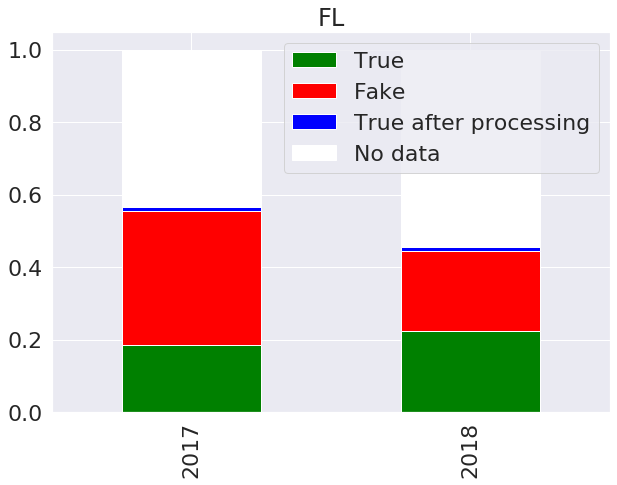

In [51]:
years = ['2017', '2018']
stats_df_year = utils.stats_year(years, [tin_17, tin_18], sset = 'fl')
stats_df_year.plot(stacked=True, kind='bar', figsize = (10,7), color=['green', 'red', 'blue','white'],
                  title = 'FL');
plt.savefig('year_fl.png')

# Качество identnumber vs Идентификация по identnumber

In [52]:
flgs = ['account_flg', 'address_flg', 'birth_date_flg', 'birth_place_flg', 'fio_flg', 'inn_flg', 
        'name_org_flg', 'fl_ru_pass_flg', 'fl_forn_pass_flg']

flgs_db = ['ogrn_flg', 'src_bls_flg', 'src_egrn_egrul_flg', 'src_kik_flg', 'src_residency_flg', 'ogrn_ip_flg']

In [53]:
def quality_vs_ident(data_y):
    print(data_y.identification_status.value_counts())
    # идентифицировано
    ide = round(100 * data_y[(data_y.identification_status == 1)].shape[0]/data_y.shape[0],2)
    print('Идентифицировано: ', ide)
    # на верификацию
    verif = round(100 * data_y[(data_y.identification_status == 2)].shape[0]/data_y.shape[0],2)
    print('На верификацию: ', verif)
    print('Идент + вериф: ', ide + verif)
    
    # идентифицировано по инн
    print('\nИдентифицировано или на вериф-ю по инн: ',round(100*data_y.inn_flg[data_y.inn_flg == True].shape[0]/data_y.shape[0],2))
     
    for f in flgs:
        print(f,':', data_y[f][data_y[f] == True].shape[0])
    n_db = 0
    print("\nDB")
    for f in flgs_db:
    
        n = data_y[f][data_y[f] == True].shape[0]
        print(f,':', n)
        n_db += n
    print(n_db)
    
    
    print('\nКАЧЕСТВО ВСЕЙ ВЫБОРКИ')
    zag1, pas1, inn1, zag_p1, pas_p1, inn_p1, inn_ul_add1, inn_add1 = define_quality_fl(data_y.identnumber, 
                                                                                return_statistics=True, 
                                                                                eval_quality = True)
    
    good_qual1, _, good_after1, _ = define_quality_fl(data_y.identnumber, return_tins = True)
    
    data_ide_inn = data_y.identnumber[(data_y.inn_flg == True)]
    print(data_ide_inn.shape)
    
    print('\nИДЕНТИФИЦИРОВАНО ИЛИ НА ВЕРИФИКАЦИЮ по ИНН\n')
    zag2, pas2, inn2, zag_p2, pas_p2, inn_p2, inn_ul_add2, inn_add2 = define_quality_fl(data_ide_inn, 
                                                                                        return_statistics=True,
                                                                                        eval_quality = True)
    
    good_qual2, _, good_after2, _ = define_quality_fl(data_ide_inn, return_tins = True)
    
    
#     for name, s1, s2 in zip(['zag', 'pas', 'inn', 'zag_p', 'pas_p', 'inn_p', 'inn_ul_add', 'inn_add'],
#                             [zag1, pas1, inn1, zag_p1, pas_p1, inn_p1, inn_ul_add1, inn_add1],
#                             [zag2, pas2, inn2, zag_p2, pas_p2, inn_p2, inn_ul_add2, inn_add2]):
        
#         print(name, round(s1*100 - (s2*100 * data_ide_inn.shape[0])/data_y.shape[0],1))
        
    
#     idx1 = []
#     for tin in tqdm(list(set(good_qual1) - set(good_qual2))):
#         for i in data_y[data_y.identnumber == tin].index:
#             idx1.append(i)
#     idst = data_y.identification_status.iloc[idx1]
#     qual_dif = round(100 * idst[(idst == 2) | (idst == 3)].shape[0]/data_y.shape[0], 2)
#     print('Качественных, но не идентифицированных или на верификацию, %: ', qual_dif)
#     print(idst.value_counts().sort_index())
    
#     idx2 = []
#     for tin in tqdm(list(set(good_after1) - set(good_after2))):
#         for i in data_y[data_y.identnumber == tin].index:
#             idx2.append(i)
#     idst = data_y.identification_status.iloc[idx2]
#     qual_after_dif = round(100 * idst[(idst == 2) | (idst == 3)].shape[0]/data_y.shape[0], 2)
#     print('Качественных после обработки, но не идентифицированных или на верификацию, %: ', qual_after_dif)
#     print(idst.value_counts().sort_index())
    
#     print('Потенциальное увеличение идентификации на {} %'.format(qual_dif+qual_after_dif))
        
    return good_qual1, good_qual2, good_after1, good_after2 #, idx1, idx2
    

In [17]:
data_17.identnumber[(data_17.inn_flg == True) & (data_17.birth_date_flg == True)].shape[0]

63355

In [18]:
data_17.identnumber[(data_17.fio_flg == True) & (data_17.birth_date_flg == True)].shape[0]

260891

In [19]:
data_17.identnumber[(data_17.inn_flg == True) & (data_17.fio_flg == True)].shape[0]

48064

In [20]:
data_17.identnumber[(data_17.fio_flg == True) & (data_17.birth_date_flg == True) & (data_17.inn_flg == True)].shape[0]

47347

In [54]:
good_qual1, good_qual2, good_after1, good_after2 = quality_vs_ident(data_17)

1.0    284088
3.0    185802
2.0      8286
Name: identification_status, dtype: int64
Идентифицировано:  59.41
На верификацию:  1.73
Идент + вериф:  61.13999999999999

Идентифицировано или на вериф-ю по инн:  13.65
account_flg : 39966
address_flg : 0
birth_date_flg : 290164
birth_place_flg : 0
fio_flg : 261646
inn_flg : 65258
name_org_flg : 311
fl_ru_pass_flg : 0
fl_forn_pass_flg : 0

DB
ogrn_flg : 0
src_bls_flg : 39966
src_egrn_egrul_flg : 278034
src_kik_flg : 3370
src_residency_flg : 1212
ogrn_ip_flg : 39
322621

КАЧЕСТВО ВСЕЙ ВЫБОРКИ
Содержат цифры: 49.4 %
Содержат ТОЛЬКО буквы/символы: 7.3 %

Содержат ТОЛЬКО цифры: 45.4 %
Потенциально качественные 9,10,12: 24.8 %
Данные с лишними цифрами >12: 1.6 %
Неполные данные : 19.0 %

Потенциально качественные загран: 3.1 %
Потенциально качественные росс.пасп или ИНН ЮЛ: 1.6 %
Потенциально качественные ИНН: 13.7 %
Невалидные документы: 6.0 %

Зашумленные данные: 4.0 %
Потенциально качественные 9,10,12 после преобразований: 1.1 %
Данные с лишним

In [55]:
# idx = []
# for tin in tqdm(list(set(good_qual1 + good_after1))):
#     for i in data_17[data_17.identnumber == tin].index:
#         idx.append(i)
# idst = data_17.iloc[idx]

idst = data_17[data_17.identnumber.isin(good_qual1 + good_after1)]
print(idst.shape)
print(idst.identification_status.value_counts().sort_index())

print('Идентифицировано по ИНН, %: ', round(100 * idst[((idst.identification_status == 1) | (idst.identification_status == 2))\
                                                       & (idst.inn_flg == True)].shape[0]/idst.shape[0], 2))

# print('На верификацию по ИНН, %: ', round(100 * idst[(idst.identification_status == 2) & \
#                                                        (idst.inn_flg == True)].shape[0]/idst.shape[0], 2))


print('Идентифицировано не по ИНН, %: ', round(100 * idst[((idst.identification_status == 1)|(idst.identification_status == 2)) \
                                                          & (idst.inn_flg != True)].shape[0]/idst.shape[0], 2))

ide_all = round(100 * idst[(idst.identification_status == 1)].shape[0]/idst.shape[0], 2)
verif_all = round(100 * idst[(idst.identification_status == 2)].shape[0]/idst.shape[0], 2)
print('Идентифицировано всего, %: ', ide_all)
print('На верификацию всего, %: ', verif_all)

print('Качественные не идентифицированные, %', 100 - ide_all - verif_all)
print('Качественные не идентифицированные от общей выборки, %', (100 - ide_all - verif_all)*idst.shape[0]/data_17.shape[0])

(89691, 101)
1.0    77742
2.0     3356
3.0     8593
Name: identification_status, dtype: int64
Идентифицировано по ИНН, %:  70.9
Идентифицировано не по ИНН, %:  18.12
На верификацию не по ИНН, %:  1.4
Идентифицировано всего, %:  86.68
На верификацию всего, %:  3.74
Качественные не идентифицированные, % 9.579999999999993
Качественные не идентифицированные от общей выборки, % 1.7969111373218216


In [56]:
good_qual1, good_qual2, good_after1, good_after2 = quality_vs_ident(data_18)

1.0    289587
3.0    262385
2.0     42863
Name: identification_status, dtype: int64
Идентифицировано:  48.68
На верификацию:  7.21
Идент + вериф:  55.89

Идентифицировано или на вериф-ю по инн:  20.17
account_flg : 42399
address_flg : 0
birth_date_flg : 295891
birth_place_flg : 0
fio_flg : 287073
inn_flg : 119965
name_org_flg : 563
fl_ru_pass_flg : 0
fl_forn_pass_flg : 0

DB
ogrn_flg : 0
src_bls_flg : 42399
src_egrn_egrul_flg : 321962
src_kik_flg : 9448
src_residency_flg : 2572
ogrn_ip_flg : 69
376450

КАЧЕСТВО ВСЕЙ ВЫБОРКИ
Содержат цифры: 37.9 %
Содержат ТОЛЬКО буквы/символы: 7.6 %

Содержат ТОЛЬКО цифры: 32.7 %
Потенциально качественные 9,10,12: 28.5 %
Данные с лишними цифрами >12: 0.8 %
Неполные данные : 3.3 %

Потенциально качественные загран: 1.2 %
Потенциально качественные росс.пасп или ИНН ЮЛ: 1.1 %
Потенциально качественные ИНН: 20.1 %
Невалидные документы: 5.9 %

Зашумленные данные: 5.3 %
Потенциально качественные 9,10,12 после преобразований: 1.0 %
Данные с лишними цифрами >1

In [57]:
idst = data_18[data_18.identnumber.isin(good_qual1 + good_after1)]
print(idst.shape)
print(idst.identification_status.value_counts().sort_index())

print('Идентифицировано по ИНН, %: ', round(100 * idst[((idst.identification_status == 1) | (idst.identification_status == 2))\
                                                       & (idst.inn_flg == True)].shape[0]/idst.shape[0], 2))


print('Идентифицировано не по ИНН, %: ', round(100 * idst[((idst.identification_status == 1)|(idst.identification_status == 2)) \
                                                          & (idst.inn_flg != True)].shape[0]/idst.shape[0], 2))

ide_all = round(100 * idst[(idst.identification_status == 1)].shape[0]/idst.shape[0], 2)
verif_all = round(100 * idst[(idst.identification_status == 2)].shape[0]/idst.shape[0], 2)
print('Идентифицировано всего, %: ', ide_all)
print('На верификацию всего, %: ', verif_all)

print('Качественные не идентифицированные, %', 100 - ide_all - verif_all)
print('Качественные не идентифицированные от общей выборки, %', (100 - ide_all - verif_all)*idst.shape[0]/data_18.shape[0])

(134765, 101)
1.0    89921
2.0    38027
3.0     6817
Name: identification_status, dtype: int64
Идентифицировано по ИНН, %:  86.85
Идентифицировано не по ИНН, %:  8.09
Идентифицировано всего, %:  66.72
На верификацию всего, %:  28.22
Качественные не идентифицированные, % 5.060000000000002
Качественные не идентифицированные от общей выборки, % 1.1463847178045719


In [59]:
(0.23+0.85)/2

0.54

In [ ]:
data_17.fio_flg.iloc[idx].value_counts()

In [ ]:
data_17.birth_date_flg.iloc[idx].value_counts()

In [ ]:
data_17.inn_flg.value_counts()

In [ ]:
data_17.inn_flg.isnull().sum()

## Критерии качества

**TIN**  

1. **Содержат ТОЛЬКО буквы/символы или пусто** - те строки, в которых тин вообще ни в каком виде не указан или тины, не содержащие цифры (н-р, AAAAAAAAA, noTINavailable)
2. **неполные данные** - тины, содержащие мало цифр для идентификации (надо решить, например, 4 цифры мы можем использовать для идентификации как серию? или начать с 6 - номер паспорта либо 7 - номер заграна)
3. **данные с дополнительными цифрами** - лишние цифры в номере документа, представляющие собой шум (00 в начале) либо склееные 2 типа документа
4. **зашумленные данные** - вперемежку с буквами, словами, знаками и т.д
5. **скрываемые данные** - 1 в верхнем регистре вместо обычной единицы, D вместо 0, B вместо 8
6. **невалидные документы** - номера, не проходящие проверку ни на один документ
7. **данные, в которые необходимо добавить/удалить 1 цифру** (часто 0)




## Вероятность идентификации:
min - % тинов, которые указаны в правильном цифровом формате, количество символов соответствует количеству символов в российских документах

max - % тинов, которые можно привести к правильному формату путем многочисленных преобразований  